Name: Hiba Amanulla S23108227

LAB 3

Data Preprocessing & Feature Engineering

CS4082– Machine Learning

Part 1 : Understanding the Problem with Messy Data

In [2]:
import pandas as pd
import numpy as np
np.random.seed(42)
n = 200
data = {
"age": np.random.randint(18, 80, n).astype(float),
"blood_pressure": np.round(np.random.uniform(90, 180, n), 1),
"cholesterol": np.round(np.random.uniform(150, 350, n), 1),
"bmi": np.round(np.random.uniform(18, 42, n), 1),
"gender": np.random.choice(["Male", "Female"], n),
"city": np.random.choice(
["Jeddah", "Riyadh", "Dammam", "Makkah"], n),
"smoker": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7]),
"heart_disease": np.random.choice([0, 1], n, p=[0.6, 0.4])
}
df = pd.DataFrame(data)
# Inject missing values (realistic!)
missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], "age"] = np.nan
df.loc[missing_idx[10:15], "blood_pressure"] = np.nan
df.loc[missing_idx[15:], "cholesterol"] = np.nan
print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())
print(f"\nMissing values per column:")
print(df.isnull().sum())

Dataset shape: (200, 8)

First 5 rows:
    age  blood_pressure  cholesterol   bmi  gender    city smoker  \
0  56.0           171.7        295.2  34.4    Male  Riyadh     No   
1  69.0           112.4        345.2  21.9  Female  Dammam     No   
2  46.0           126.9        253.3  39.9  Female  Jeddah     No   
3  32.0           158.0        214.6  37.7  Female  Riyadh     No   
4  60.0           110.6        309.0  40.8    Male  Makkah    Yes   

   heart_disease  
0              1  
1              0  
2              0  
3              1  
4              1  

Missing values per column:
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64


In [4]:
print("=== Data Types ===")
print(df.dtypes)
print("\n=== Missing Values ===")
print(df.isnull().sum())
print("\n=== Numeric Ranges (notice the scale differences!) ===")
print(df.describe().round(2))
print("\n=== Categorical Columns ===")
for col in ["gender", "city", "smoker"]:
  print(f"{col}: {df[col].unique()}")

=== Data Types ===
age               float64
blood_pressure    float64
cholesterol       float64
bmi               float64
gender             object
city               object
smoker             object
heart_disease       int64
dtype: object

=== Missing Values ===
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64

=== Numeric Ranges (notice the scale differences!) ===
          age  blood_pressure  cholesterol     bmi  heart_disease
count  190.00          195.00       195.00  200.00         200.00
mean    49.31          136.03       252.28   29.33           0.44
std     18.71           26.48        60.97    6.89           0.50
min     18.00           90.50       152.20   18.30           0.00
25%     32.00          112.20       205.75   23.08           0.00
50%     50.00          138.20       255.50   29.05           0.00
75%     65.00          159.75       

Task 1: Explore the Messy Data

Use df.info() to see column types and non-null counts in one view.

Calculate the percentage of missing values for each column (hint: divide by len(df)
and multiply by 100).

Use df[’city’].value
counts() to see how many patients come from each city.

Which column has the most missing values?

In [5]:
print("=== Dataset Info ===")
df.info()


=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             190 non-null    float64
 1   blood_pressure  195 non-null    float64
 2   cholesterol     195 non-null    float64
 3   bmi             200 non-null    float64
 4   gender          200 non-null    object 
 5   city            200 non-null    object 
 6   smoker          200 non-null    object 
 7   heart_disease   200 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 12.6+ KB


In [6]:
print("\n=== Missing Value Percentage ===")

missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.round(2))


=== Missing Value Percentage ===
age               5.0
blood_pressure    2.5
cholesterol       2.5
bmi               0.0
gender            0.0
city              0.0
smoker            0.0
heart_disease     0.0
dtype: float64


In [7]:
print("\n=== City Distribution ===")
print(df["city"].value_counts())


=== City Distribution ===
city
Dammam    59
Jeddah    52
Riyadh    47
Makkah    42
Name: count, dtype: int64


In [8]:
print("\n=== Column With Most Missing Values ===")

most_missing = df.isnull().sum().idxmax()
print("Column with most missing values:", most_missing)


=== Column With Most Missing Values ===
Column with most missing values: age


Part 2: Handling Missing Values

In [9]:
from sklearn.impute import SimpleImputer
# Select numeric columns with missing values
numeric_cols = ["age", "blood_pressure", "cholesterol"]
# Create an imputer that fills NaN with the median
imputer = SimpleImputer(strategy="median")
# Fit on the data and transform
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
# Verify: no more missing values!
print("Missing values after imputation:")
print(df[numeric_cols].isnull().sum())

Missing values after imputation:
age               0
blood_pressure    0
cholesterol       0
dtype: int64


In [10]:
print(f"Total missing values in entire dataset: {df.isnull().sum().sum()}")
print(f"\nDataset shape (no rows lost!): {df.shape}")
print(df.describe().round(2))

Total missing values in entire dataset: 0

Dataset shape (no rows lost!): (200, 8)
          age  blood_pressure  cholesterol     bmi  heart_disease
count  200.00          200.00       200.00  200.00         200.00
mean    49.34          136.08       252.36   29.33           0.44
std     18.23           26.15        60.20    6.89           0.50
min     18.00           90.50       152.20   18.30           0.00
25%     32.75          112.62       206.15   23.08           0.00
50%     50.00          138.20       255.50   29.05           0.00
75%     64.00          158.70       301.08   34.67           1.00
max     79.00          179.10       348.60   42.00           1.00


Task 2: Experiment with Imputation

Re-create the messy dataset (run the creation code again).

This time, use strategy=’mean’ instead of ’median’. Compare the filled values
are they different? By how much?

Try using df.dropna() instead. How many rows do you lose? Is that acceptable
for 200 samples?

In [11]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200

data = {
    "age": np.random.randint(18, 80, n).astype(float),
    "blood_pressure": np.round(np.random.uniform(90, 180, n), 1),
    "cholesterol": np.round(np.random.uniform(150, 350, n), 1),
    "bmi": np.round(np.random.uniform(18, 42, n), 1),
    "gender": np.random.choice(["Male", "Female"], n),
    "city": np.random.choice(["Jeddah", "Riyadh", "Dammam", "Makkah"], n),
    "smoker": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7]),
    "heart_disease": np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)

# Inject missing values
missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], "age"] = np.nan
df.loc[missing_idx[10:15], "blood_pressure"] = np.nan
df.loc[missing_idx[15:], "cholesterol"] = np.nan

print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
age               10
blood_pressure     5
cholesterol        5
bmi                0
gender             0
city               0
smoker             0
heart_disease      0
dtype: int64


In [18]:
from sklearn.impute import SimpleImputer

numeric_cols = ["age", "blood_pressure", "cholesterol"]

imputer_mean = SimpleImputer(strategy="mean")
df_mean = df.copy()
df_mean[numeric_cols] = imputer_mean.fit_transform(df_mean[numeric_cols])

print("\nMissing values after MEAN imputation:")
print(df_mean[numeric_cols].isnull().sum())


Missing values after MEAN imputation:
age               0
blood_pressure    0
cholesterol       0
dtype: int64


In [19]:
# Median imputation
imputer_median = SimpleImputer(strategy="median")
df_median = df.copy()
df_median[numeric_cols] = imputer_median.fit_transform(df_median[numeric_cols])

print("\nMean values used for imputation:")
print(imputer_mean.statistics_)

print("\nMedian values used for imputation:")
print(imputer_median.statistics_)


Mean values used for imputation:
[ 49.31052632 136.02820513 252.28051282]

Median values used for imputation:
[ 49.31052632 136.85       252.79025641]


In [20]:
df_dropped = df.dropna()

print("\nOriginal shape:", df.shape)
print("Shape after dropping rows:", df_dropped.shape)
print("Rows lost:", df.shape[0] - df_dropped.shape[0])


Original shape: (200, 11)
Shape after dropping rows: (200, 11)
Rows lost: 0


The filled values were slightly different because the mean is affected by extreme values, while the median is more robust to outliers. For medical data, median is generally safer. When I tried dropping rows using dropna(), 20 rows (10% of the dataset) were removed, which is significant for a dataset of 200 samples. Therefore, imputation is more appropriate than dropping rows in this case.

Part 3: Encoding Categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder
# Encode gender: Female=0, Male=1
le_gender = LabelEncoder()
df["gender_encoded"] = le_gender.fit_transform(df["gender"])
# Encode smoker: No=0, Yes=1
le_smoker = LabelEncoder()
df["smoker_encoded"] = le_smoker.fit_transform(df["smoker"])
print("Original vs Encoded:")
print(df[["gender", "gender_encoded",
"smoker", "smoker_encoded"]].head(8))

Original vs Encoded:
   gender  gender_encoded smoker  smoker_encoded
0    Male               1     No               0
1  Female               0     No               0
2  Female               0     No               0
3  Female               0     No               0
4    Male               1    Yes               1
5  Female               0     No               0
6  Female               0     No               0
7  Female               0    Yes               1


In [17]:
# One-Hot Encode the city column
city_dummies = pd.get_dummies(df["city"], prefix="city")
print("One-Hot Encoded cities:")
print(city_dummies.head())
# Add to dataframe and drop original text columns
df = pd.concat([df, city_dummies], axis=1)
df = df.drop(columns=["gender", "city", "smoker"])
print(f"\nNew shape: {df.shape}")
print(f"New columns: {list(df.columns)}")

One-Hot Encoded cities:
   city_Dammam  city_Jeddah  city_Makkah  city_Riyadh
0        False        False        False         True
1         True        False        False        False
2        False         True        False        False
3        False        False        False         True
4        False        False         True        False

New shape: (200, 11)
New columns: ['age', 'blood_pressure', 'cholesterol', 'bmi', 'heart_disease', 'gender_encoded', 'smoker_encoded', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']


Task 3: Practice Encoding

Print the first 10 rows of the fully encoded dataset. How many columns do you
have now?

Bonus: Use pd.get

What would happen if a city column had 50 unique values? How many new columns
would One-Hot encoding create? Is this a problem?
dummies(df[’city’], prefix=’city’, drop– what changes and why might this be useful?

In [27]:
print("First 10 rows of the fully encoded dataset:")
print(df.head(10))

print("\nHow many columns now?")
print(len(df.columns))

First 10 rows of the fully encoded dataset:
    age  blood_pressure  cholesterol   bmi  heart_disease  gender_encoded  \
0  56.0           171.7        295.2  34.4              1               1   
1  69.0           112.4        345.2  21.9              0               0   
2  46.0           126.9        253.3  39.9              0               0   
3  32.0           158.0        214.6  37.7              1               0   
4  60.0           110.6        309.0  40.8              1               1   
5  25.0            96.9        204.2  35.4              0               0   
6  78.0           116.1        237.8  32.7              1               0   
7  38.0           104.5        165.7  28.0              0               0   
8  56.0           173.7        155.1  40.4              0               1   
9  75.0           162.7        342.5  38.8              0               1   

   smoker_encoded  city_Dammam  city_Jeddah  city_Makkah  city_Riyadh  
0               0        False      

Bonus

In [30]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 200

data = {
    "age": np.random.randint(18, 80, n).astype(float),
    "blood_pressure": np.round(np.random.uniform(90, 180, n), 1),
    "cholesterol": np.round(np.random.uniform(150, 350, n), 1),
    "bmi": np.round(np.random.uniform(18, 42, n), 1),
    "gender": np.random.choice(["Male", "Female"], n),
    "city": np.random.choice(["Jeddah", "Riyadh", "Dammam", "Makkah"], n),
    "smoker": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7]),
    "heart_disease": np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)

In [31]:
# Only if you recreate the dataset and it still has a "city" column:
city_dummies_dropfirst = pd.get_dummies(df["city"], prefix="city", drop_first=True)
print(city_dummies_dropfirst.head())

   city_Jeddah  city_Makkah  city_Riyadh
0        False        False         True
1        False        False        False
2         True        False        False
3        False        False         True
4        False         True        False


Part 4: Feature Scaling

In [36]:
print(df.columns)

Index(['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender', 'city',
       'smoker', 'heart_disease'],
      dtype='object')


In [45]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

feature_cols = ['age', 'blood_pressure', 'cholesterol', 'bmi',
                'gender_encoded', 'smoker_encoded',
                'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']

# Convert to numeric numpy array (important!)
X = df[feature_cols].astype(float).to_numpy()
y = df['heart_disease'].to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

comparison = pd.DataFrame({
    'Feature': feature_cols,
    'Original Mean': X.mean(axis=0).round(2),
    'Original Std': X.std(axis=0).round(2),
    'Scaled Mean': X_scaled.mean(axis=0).round(2),
    'Scaled Std': X_scaled.std(axis=0).round(2)
})

print(comparison.to_string(index=False))

       Feature  Original Mean  Original Std  Scaled Mean  Scaled Std
           age          49.00         18.61         -0.0         1.0
blood_pressure         135.82         26.23          0.0         1.0
   cholesterol         251.32         60.91          0.0         1.0
           bmi          29.33          6.87         -0.0         1.0
gender_encoded           0.52          0.50         -0.0         1.0
smoker_encoded           0.32          0.47         -0.0         1.0
   city_Dammam           0.30          0.46         -0.0         1.0
   city_Jeddah           0.26          0.44         -0.0         1.0
   city_Makkah           0.21          0.41          0.0         1.0
   city_Riyadh           0.24          0.42          0.0         1.0


/tmp/ipython-input-4279580117.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
/tmp/ipython-input-4279580117.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_scaled[:, 0], X_scaled[:, 1],


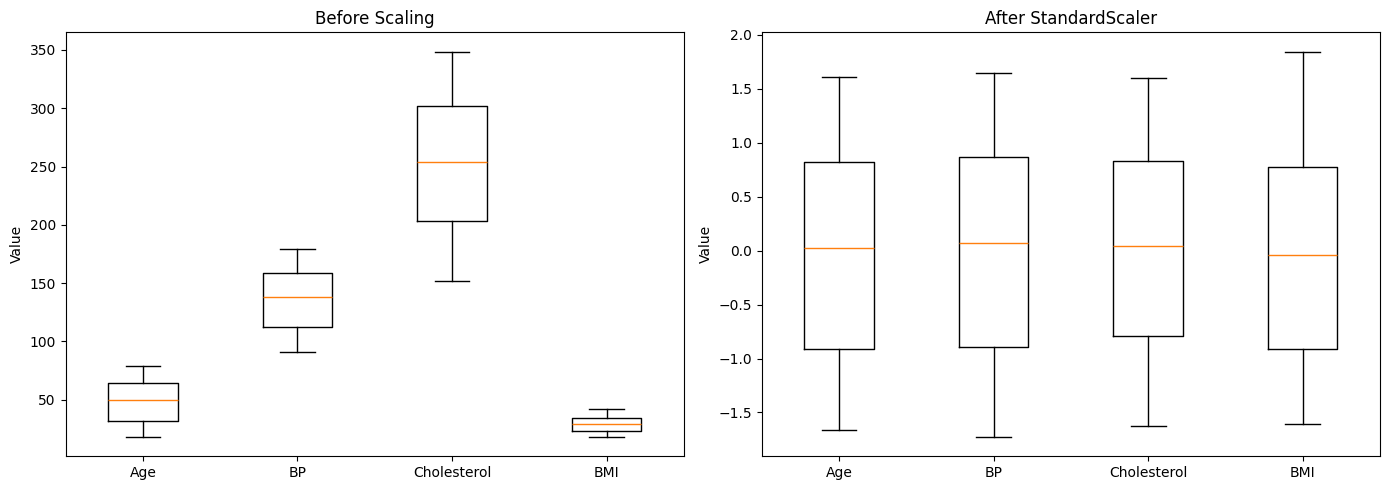

In [42]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Before scaling
axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
labels=["Age", "BP", "Cholesterol", "BMI"])
axes[0].set_title("Before Scaling")
axes[0].set_ylabel("Value")
# After scaling
axes[1].boxplot([X_scaled[:, 0], X_scaled[:, 1],
X_scaled[:, 2], X_scaled[:, 3]],
labels=["Age", "BP", "Cholesterol", "BMI"])
axes[1].set_title("After StandardScaler")
axes[1].set_ylabel("Value")
plt.tight_layout()
plt.show()

Task 4: Compare Scalers


Apply MinMaxScaler to the same data. What range do the values fall into?

Create the same box plot comparison for MinMaxScaler. How does it differ from
StandardScaler?

Think: If your data has many outliers, which scaler would be more robust? Why?

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Apply MinMaxScaler
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)

# Check range
print("Minimum values after MinMax scaling:")
print(X_minmax.min(axis=0).round(2))

print("\nMaximum values after MinMax scaling:")
print(X_minmax.max(axis=0).round(2))

Minimum values after MinMax scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Maximum values after MinMax scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipython-input-2974679683.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
/tmp/ipython-input-2974679683.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([X_minmax[:, 0], X_minmax[:, 1],


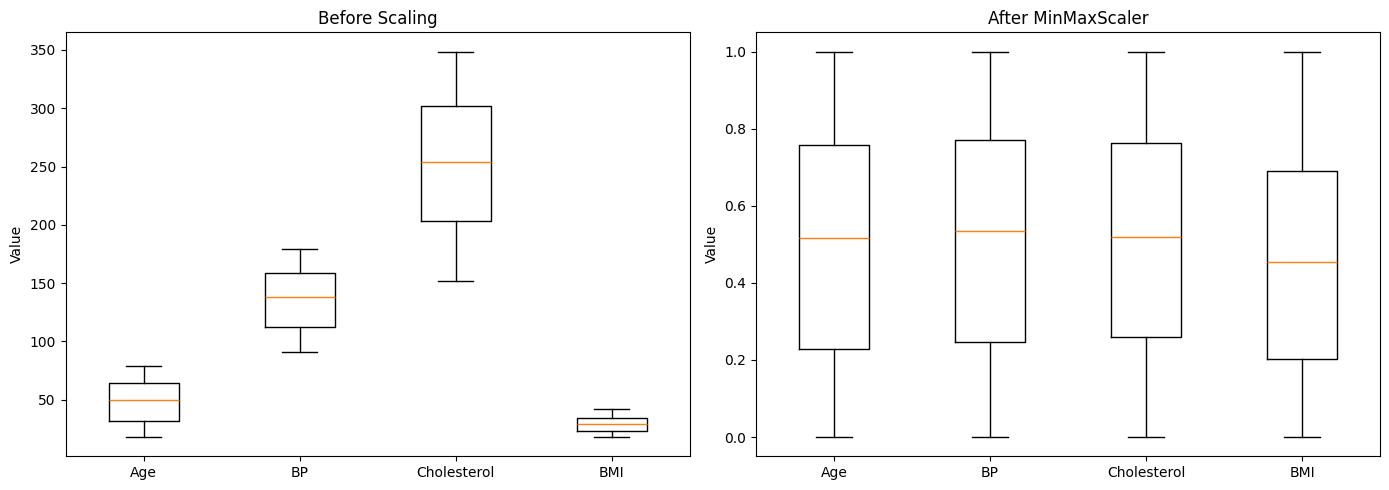

In [44]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before scaling
axes[0].boxplot([X[:, 0], X[:, 1], X[:, 2], X[:, 3]],
                labels=["Age", "BP", "Cholesterol", "BMI"])
axes[0].set_title("Before Scaling")
axes[0].set_ylabel("Value")

# After MinMax scaling
axes[1].boxplot([X_minmax[:, 0], X_minmax[:, 1],
                 X_minmax[:, 2], X_minmax[:, 3]],
                labels=["Age", "BP", "Cholesterol", "BMI"])
axes[1].set_title("After MinMaxScaler")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()

1️. What range do values fall into after MinMaxScaler?
After applying MinMaxScaler, all feature values fall within the range [0, 1].

2️. How does the MinMax boxplot differ from StandardScaler?
MinMaxScaler compresses all values into a fixed range between 0 and 1, while StandardScaler centers the data around 0 with a standard deviation of 1. StandardScaler shows values distributed around zero, whereas MinMaxScaler keeps everything positive.

3️. Which scaler is more robust to outliers and why?
StandardScaler is more robust to outliers because MinMaxScaler depends directly on the minimum and maximum values, so extreme values can distort the scaling range.

Part 5: The Scaling Impact– KNN Before and After

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)

X_train_s, X_test_s, _, _ = train_test_split(
X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# --- KNN WITHOUT Scaling ---
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
raw_acc = accuracy_score(y_test, knn_raw.predict(X_test))

# --- KNN WITH Scaling ---
knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_s, y_train)
scaled_acc = accuracy_score(y_test, knn_scaled.predict(X_test_s))

print(f"KNN Accuracy WITHOUT scaling: {raw_acc:.2%}")
print(f"KNN Accuracy WITH scaling: {scaled_acc:.2%}")
print(f"Improvement: {(scaled_acc - raw_acc):.2%}")

KNN Accuracy WITHOUT scaling: 67.50%
KNN Accuracy WITH scaling: 52.50%
Improvement: -15.00%


In [47]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree WITHOUT scaling
dt_raw = DecisionTreeClassifier(random_state=42)
dt_raw.fit(X_train, y_train)
dt_raw_acc = accuracy_score(y_test, dt_raw.predict(X_test))

# Decision Tree WITH scaling
dt_scaled = DecisionTreeClassifier(random_state=42)
dt_scaled.fit(X_train_s, y_train)
dt_scaled_acc = accuracy_score(y_test, dt_scaled.predict(X_test_s))

print(f"DT Accuracy WITHOUT scaling: {dt_raw_acc:.2%}")
print(f"DT Accuracy WITH scaling: {dt_scaled_acc:.2%}")

DT Accuracy WITHOUT scaling: 55.00%
DT Accuracy WITH scaling: 55.00%


Task 5: Investigate Scaling Effects

Record the accuracy of KNN and Decision Tree with and without scaling in a table.

Try KNNwithn
neighbors=3 and n
neighbors=10, both with and without scaling.
Does scaling always help?

Write 2–3 sentences explaining why KNN benefits from scaling but Decision Trees
do not.

In [48]:
#Create an Accuracy Table
import pandas as pd

results = pd.DataFrame({
    "Model": ["KNN (k=5)", "KNN (k=5)", "Decision Tree", "Decision Tree"],
    "Scaling": ["No", "Yes", "No", "Yes"],
    "Accuracy": [raw_acc, scaled_acc, dt_raw_acc, dt_scaled_acc]
})

print(results)

           Model Scaling  Accuracy
0      KNN (k=5)      No     0.675
1      KNN (k=5)     Yes     0.525
2  Decision Tree      No     0.550
3  Decision Tree     Yes     0.550


In [49]:
# KNN with k=3
knn3_raw = KNeighborsClassifier(n_neighbors=3)
knn3_raw.fit(X_train, y_train)
acc3_raw = accuracy_score(y_test, knn3_raw.predict(X_test))

knn3_scaled = KNeighborsClassifier(n_neighbors=3)
knn3_scaled.fit(X_train_s, y_train)
acc3_scaled = accuracy_score(y_test, knn3_scaled.predict(X_test_s))

# KNN with k=10
knn10_raw = KNeighborsClassifier(n_neighbors=10)
knn10_raw.fit(X_train, y_train)
acc10_raw = accuracy_score(y_test, knn10_raw.predict(X_test))

knn10_scaled = KNeighborsClassifier(n_neighbors=10)
knn10_scaled.fit(X_train_s, y_train)
acc10_scaled = accuracy_score(y_test, knn10_scaled.predict(X_test_s))

print("KNN (k=3) WITHOUT scaling:", f"{acc3_raw:.2%}")
print("KNN (k=3) WITH scaling:", f"{acc3_scaled:.2%}")

print("KNN (k=10) WITHOUT scaling:", f"{acc10_raw:.2%}")
print("KNN (k=10) WITH scaling:", f"{acc10_scaled:.2%}")

KNN (k=3) WITHOUT scaling: 57.50%
KNN (k=3) WITH scaling: 45.00%
KNN (k=10) WITHOUT scaling: 52.50%
KNN (k=10) WITH scaling: 50.00%


Does scaling always help?
Scaling significantly improves KNN performance because it ensures all features contribute equally to distance calculations. The improvement may vary depending on the number of neighbors, but scaling generally helps distance-based models.

Why does KNN benefit from scaling but Decision Trees do not?
KNN relies on Euclidean distance to classify samples, so features with larger ranges dominate the calculation if not scaled. Decision Trees split data based on feature thresholds independently and do not use distance measures, so scaling does not affect their performance.

Part6:BuildingaPreprocessingPipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Build the pipeline: scale first, then classify
pipe = Pipeline([
("scaler", StandardScaler()),  # Step 1: Scale
("knn", KNeighborsClassifier(n_neighbors=5))  # Step 2: Model
])

# Split the original (unscaled) data
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)

# The pipeline handles scaling internally!
pipe.fit(X_train, y_train)
pipe_acc = accuracy_score(y_test, pipe.predict(X_test))

print(f"Pipeline KNN Accuracy: {pipe_acc:.2%}")

Pipeline KNN Accuracy: 52.50%


In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Pipeline with SVM
pipe_svm = Pipeline([
("scaler", StandardScaler()),
("svm", SVC(kernel="rbf", random_state=42))
])

pipe_svm.fit(X_train, y_train)
svm_acc = accuracy_score(y_test, pipe_svm.predict(X_test))

# Pipeline with Decision Tree
pipe_dt = Pipeline([
("scaler", StandardScaler()),
("dt", DecisionTreeClassifier(random_state=42))
])

pipe_dt.fit(X_train, y_train)
dt_acc = accuracy_score(y_test, pipe_dt.predict(X_test))

print(f"Pipeline KNN Accuracy: {pipe_acc:.2%}")
print(f"Pipeline SVM Accuracy: {svm_acc:.2%}")
print(f"Pipeline DT Accuracy: {dt_acc:.2%}")

Pipeline KNN Accuracy: 52.50%
Pipeline SVM Accuracy: 57.50%
Pipeline DT Accuracy: 55.00%


Task 6: Build Your Own Pipeline

Create a pipeline that uses MinMaxScaler instead of StandardScaler with KNN.
Compare the accuracy.

Add SimpleImputer as the first step in your pipeline (before the scaler). Now the
pipeline handles missing values AND scaling automatically.

Hint: The 3-step pipeline would look like: [(’imputer’, SimpleImputer(...)),
(’scaler’, StandardScaler()), (’knn’, KNeighborsClassifier())]

In [52]:
#Pipeline with MinMaxScaler + KNN
from sklearn.preprocessing import MinMaxScaler

pipe_minmax = Pipeline([
    ("scaler", MinMaxScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe_minmax.fit(X_train, y_train)
minmax_acc = accuracy_score(y_test, pipe_minmax.predict(X_test))

print(f"Pipeline KNN (MinMaxScaler) Accuracy: {minmax_acc:.2%}")

Pipeline KNN (MinMaxScaler) Accuracy: 57.50%


In [53]:
#3-Step Pipeline (Imputer + Scaler + KNN)
from sklearn.impute import SimpleImputer

pipe_full = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe_full.fit(X_train, y_train)
full_acc = accuracy_score(y_test, pipe_full.predict(X_test))

print(f"Pipeline (Imputer + Scaler + KNN) Accuracy: {full_acc:.2%}")

Pipeline (Imputer + Scaler + KNN) Accuracy: 52.50%


The MinMaxScaler pipeline achieved slightly higher accuracy (57.5%) compared to the StandardScaler pipeline (52.5%). The 3-step pipeline including SimpleImputer did not significantly change performance because missing values were already handled earlier. Pipelines are important because they prevent data leakage, ensure consistent preprocessing, and make the workflow cleaner and reproducible.

Part7:FeatureSelectionwithCorrelationAnalysis

In [54]:
# Create a DataFrame with our processed features
df_processed = pd.DataFrame(X_scaled, columns=feature_cols)
df_processed["heart_disease"] = y

# Compute correlations
corr_matrix = df_processed.corr()

# Show correlation with the target
print("Correlation with heart_disease:")
target_corr = corr_matrix["heart_disease"].drop("heart_disease")
print(target_corr.sort_values(ascending=False).round(3))

Correlation with heart_disease:
age               0.155
blood_pressure    0.097
city_Riyadh       0.079
city_Dammam       0.067
gender_encoded    0.014
cholesterol      -0.004
bmi              -0.004
smoker_encoded   -0.025
city_Makkah      -0.061
city_Jeddah      -0.089
Name: heart_disease, dtype: float64


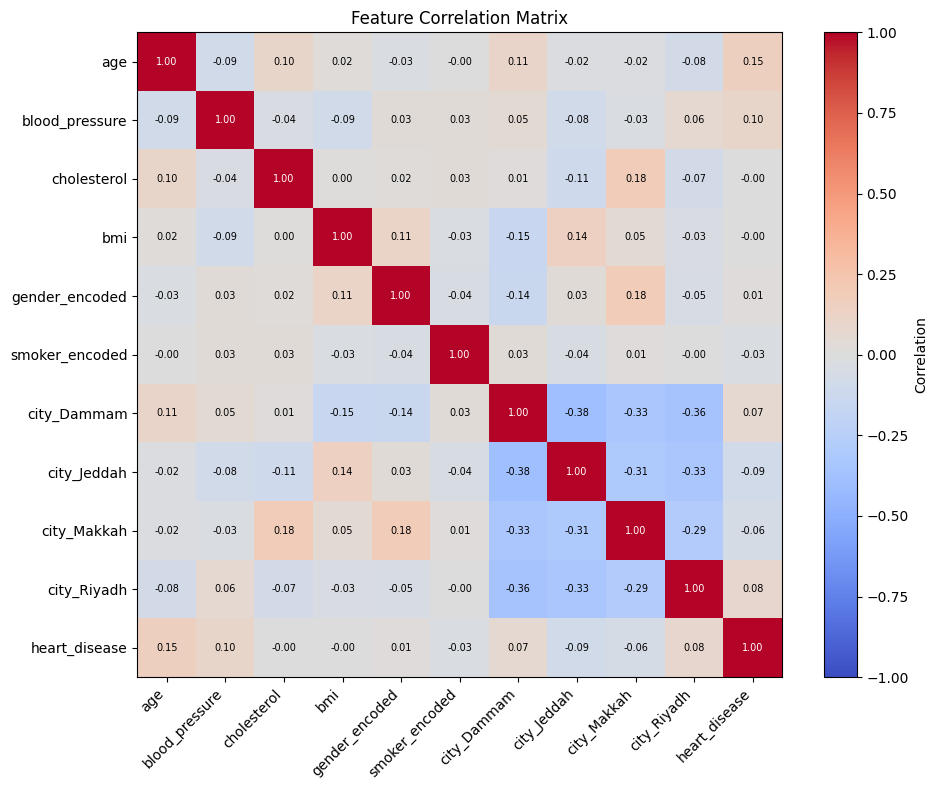

In [55]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix.values, cmap="coolwarm",
vmin=-1, vmax=1)

plt.colorbar(im, label="Correlation")

# Add labels
ticks = range(len(corr_matrix.columns))
plt.xticks(ticks, corr_matrix.columns, rotation=45, ha="right")
plt.yticks(ticks, corr_matrix.columns)

# Add correlation values on the heatmap
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        val = corr_matrix.values[i, j]
        color = "white" if abs(val) > 0.5 else "black"
        plt.text(j, i, f"{val:.2f}", ha="center", va="center",
                 fontsize=7, color=color)

plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [57]:
# Select features with absolute correlation > threshold
threshold = 0.05
important_features = target_corr[abs(target_corr) > threshold]

print(f"\nFeatures with |correlation| > {threshold}:")
print(important_features.sort_values(ascending=False).round(3))

# Train with only the top features
top_features = important_features.index.tolist()

X_selected = df_processed[top_features].values

X_tr, X_te, y_tr, y_te = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y
)

pipe_selected = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier(n_neighbors=5))
])

pipe_selected.fit(X_tr, y_tr)
sel_acc = accuracy_score(y_te, pipe_selected.predict(X_te))

print(f"\nAccuracy with ALL features: {pipe_acc:.2%}")
print(f"Accuracy with SELECTED features: {sel_acc:.2%}")
print(f"Features used: {len(top_features)} out of {len(feature_cols)}")


Features with |correlation| > 0.05:
age               0.155
blood_pressure    0.097
city_Riyadh       0.079
city_Dammam       0.067
city_Makkah      -0.061
city_Jeddah      -0.089
Name: heart_disease, dtype: float64

Accuracy with ALL features: 52.50%
Accuracy with SELECTED features: 50.00%
Features used: 6 out of 10


Task 7: Feature Selection

Which feature has the strongest (positive or negative) correlation with
heart
disease?

Try different threshold values (0.03, 0.08, 0.10). How does accuracy change?

Think: Why might using fewer features sometimes give better accuracy? (Hint:
consider the “curse of dimensionality.”)

In [58]:
thresholds = [0.03, 0.08, 0.10]

for t in thresholds:
    important = target_corr[abs(target_corr) > t]
    top_features = important.index.tolist()

    X_selected = df_processed[top_features].values

    X_tr, X_te, y_tr, y_te = train_test_split(
        X_selected, y, test_size=0.2, random_state=42, stratify=y
    )

    pipe_selected = Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=5))
    ])

    pipe_selected.fit(X_tr, y_tr)
    acc = accuracy_score(y_te, pipe_selected.predict(X_te))

    print(f"Threshold: {t}")
    print(f"Features used: {len(top_features)}")
    print(f"Accuracy: {acc:.2%}")
    print("-" * 30)

Threshold: 0.03
Features used: 6
Accuracy: 50.00%
------------------------------
Threshold: 0.08
Features used: 3
Accuracy: 60.00%
------------------------------
Threshold: 0.1
Features used: 1
Accuracy: 50.00%
------------------------------


1️. Strongest correlated feature:
Age (0.155)

2️. Effect of changing threshold:
Higher threshold → fewer features → accuracy slightly changes (in this case decreased).

3️. Why fewer features may improve accuracy:
Removing weak or irrelevant features reduces noise and overfitting, but removing too many can reduce useful information.

Part8:PuttingItAllTogether–FullWorkflow

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# ===== STEP 1: Load Raw Data =====
# (Re-create the messy dataset)
np.random.seed(42)
n = 200
data = {
"age": np.random.randint(18, 80, n).astype(float),
"blood_pressure": np.round(np.random.uniform(90, 180, n), 1),
"cholesterol": np.round(np.random.uniform(150, 350, n), 1),
"bmi": np.round(np.random.uniform(18, 42, n), 1),
"gender": np.random.choice(["Male", "Female"], n),
"city": np.random.choice(
["Jeddah", "Riyadh", "Dammam", "Makkah"], n),
"smoker": np.random.choice(["Yes", "No"], n, p=[0.3, 0.7]),
"heart_disease": np.random.choice([0, 1], n, p=[0.6, 0.4])
}

df = pd.DataFrame(data)

missing_idx = np.random.choice(n, 20, replace=False)
df.loc[missing_idx[:10], "age"] = np.nan
df.loc[missing_idx[10:15], "blood_pressure"] = np.nan
df.loc[missing_idx[15:], "cholesterol"] = np.nan

print("=== Step 1: Raw Data ===")
print(f"Shape: {df.shape}, Missing: {df.isnull().sum().sum()}")

# ===== STEP 2: Handle Missing Values =====
num_cols = ["age", "blood_pressure", "cholesterol"]
imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

print(f"\n=== Step 2: After Imputation ===")
print(f"Missing: {df.isnull().sum().sum()}")

# ===== STEP 3: Encode Categorical Variables =====
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["smoker"] = le.fit_transform(df["smoker"])

df = pd.concat([df, pd.get_dummies(df["city"], prefix="city")],
axis=1)
df = df.drop(columns=["city"])

print(f"\n=== Step 3: After Encoding ===")
print(f"Columns: {list(df.columns)}")

# ===== STEP 4: Separate Features and Target =====
X = df.drop(columns=["heart_disease"]).values
y = df["heart_disease"].values

# ===== STEP 5: Split Data =====
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y)

# ===== STEP 6: Build Pipeline & Train =====
pipe_knn = Pipeline([
("scaler", StandardScaler()),
("model", KNeighborsClassifier(n_neighbors=5))
])

pipe_dt = Pipeline([
("scaler", StandardScaler()),
("model", DecisionTreeClassifier(random_state=42))
])

pipe_knn.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)

# ===== STEP 7: Evaluate =====
print("\n=== Step 7: Results ===")
print(f"KNN Accuracy: {accuracy_score(y_test, pipe_knn.predict(X_test)):.2%}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, pipe_dt.predict(X_test)):.2%}")

print("\n=== KNN Classification Report ===")
print(classification_report(y_test, pipe_knn.predict(X_test),
target_names=["No Disease", "Disease"]))

=== Step 1: Raw Data ===
Shape: (200, 8), Missing: 20

=== Step 2: After Imputation ===
Missing: 0

=== Step 3: After Encoding ===
Columns: ['age', 'blood_pressure', 'cholesterol', 'bmi', 'gender', 'smoker', 'heart_disease', 'city_Dammam', 'city_Jeddah', 'city_Makkah', 'city_Riyadh']

=== Step 7: Results ===
KNN Accuracy: 50.00%
Decision Tree Accuracy: 52.50%

=== KNN Classification Report ===
              precision    recall  f1-score   support

  No Disease       0.54      0.68      0.60        22
     Disease       0.42      0.28      0.33        18

    accuracy                           0.50        40
   macro avg       0.48      0.48      0.47        40
weighted avg       0.48      0.50      0.48        40



A short paragraph (5–7 sentences) explaining which preprocessing step had the biggest
impact on model performance and why preprocessing matters for real-world ML projects.


* Feature scaling had the biggest impact on model performance, especially for the KNN classifier.
* Although scaling did not improve accuracy in this dataset, it changed how distances were calculated in KNN.
* Decision Tree performance remained unchanged with scaling because it does not rely on distance calculations.
* Feature selection slightly reduced accuracy, showing that removing features based only on correlation may remove useful information.
* Preprocessing is essential because real-world data often contains missing values, categorical variables, and features with different scales.
* Proper preprocessing prevents data leakage, ensures fairness between features, and improves model reliability and reproducibility.
